In [1]:
import pandas as pd
import numpy as np

In [2]:
반납수=pd.read_csv('./반납수.csv', encoding='cp949')
반납수=반납수.rename(columns={'반납일시_day':'일시_day'})

In [3]:
대여수=pd.read_csv('./대여수.csv', encoding='cp949')
대여수=대여수.rename(columns={'대여일시_day':'일시_day'})

# 대여 반납 데이터 합치기

In [4]:
table=pd.merge(대여수,반납수,how='inner',on=['자치구','일시_day'])
table

,자치구,일시_day,대여수,반납수
0,강남구,2019-01-01,322,304
1,강남구,2019-01-02,602,582
2,강남구,2019-01-03,669,627
3,강남구,2019-01-04,658,633
4,강남구,2019-01-05,458,439
...,...,...,...,...
22770,중랑구,2021-06-26,2857,2871
22771,중랑구,2021-06-27,2760,2773
22772,중랑구,2021-06-28,2679,2841
22773,중랑구,2021-06-29,2646,2740


In [5]:
table['반납/대여']=table['반납수']/table['대여수']

In [6]:
table

,자치구,일시_day,대여수,반납수,반납/대여
0,강남구,2019-01-01,322,304,0.944099
1,강남구,2019-01-02,602,582,0.966777
2,강남구,2019-01-03,669,627,0.937220
3,강남구,2019-01-04,658,633,0.962006
4,강남구,2019-01-05,458,439,0.958515
...,...,...,...,...,...
22770,중랑구,2021-06-26,2857,2871,1.004900
22771,중랑구,2021-06-27,2760,2773,1.004710
22772,중랑구,2021-06-28,2679,2841,1.060470
22773,중랑구,2021-06-29,2646,2740,1.035525


In [7]:
table_중구=table[table['자치구']=='중구']

In [8]:
table_중구

,자치구,일시_day,대여수,반납수,반납/대여
20953,중구,2019-01-01,178,173,0.971910
20954,중구,2019-01-02,385,395,1.025974
20955,중구,2019-01-03,477,483,1.012579
20956,중구,2019-01-04,531,521,0.981168
20957,중구,2019-01-05,250,232,0.928000
...,...,...,...,...,...
21859,중구,2021-06-26,1848,1710,0.925325
21860,중구,2021-06-27,1390,1418,1.020144
21861,중구,2021-06-28,2958,2684,0.907370
21862,중구,2021-06-29,3029,2872,0.948168


In [9]:
table_중구.to_csv('./table_중구.csv',encoding='cp949')

In [10]:
table_simple=table.drop(['일시_day','대여수','반납수'],1)

## 반납/대여 분산 계산한 열 추가

In [11]:
grouped=pd.DataFrame(table_simple['반납/대여'].groupby(table_simple['자치구']).var())

In [12]:
grouped=grouped.rename(columns={'반납/대여':'반납/대여_var'})

In [13]:
grouped['자치구']=grouped.index

In [14]:
grouped['반납/대여_var'].unique()

array([0.00202338, 0.00084535, 0.00104237, 0.00037356, 0.0009806 ,
       0.00050074, 0.00078159, 0.00181946, 0.00038824, 0.00173833,
       0.00133934, 0.00251837, 0.00132418, 0.0026321 , 0.00095149,
       0.00191773, 0.00144142, 0.00025907, 0.00090819, 0.00124905,
       0.0015755 , 0.00148688, 0.0017146 , 0.00266334, 0.00141694])

In [19]:
grouped

,반납/대여_var,자치구
자치구,,
강남구,0.002023,강남구
강동구,0.000845,강동구
강북구,0.001042,강북구
강서구,0.000374,강서구
관악구,0.000981,관악구
광진구,0.000501,광진구
구로구,0.000782,구로구
금천구,0.001819,금천구
노원구,0.000388,노원구


In [15]:
grouped_sorted = grouped.sort_values(by='반납/대여_var' ,ascending=False)
grouped_sorted.head()

,반납/대여_var,자치구
자치구,,
중구,0.002663,중구
서대문구,0.002632,서대문구
동작구,0.002518,동작구
강남구,0.002023,강남구
성동구,0.001918,성동구


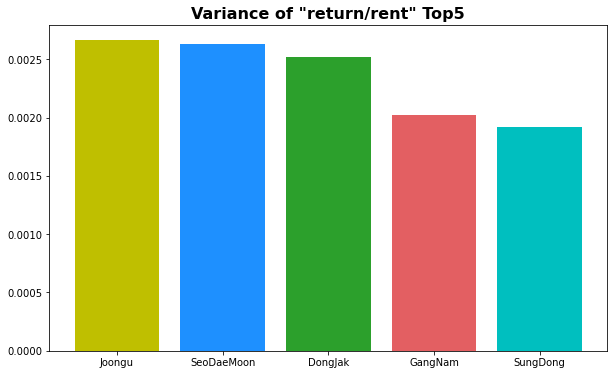

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(5)
자치구 = ['Joongu','SeoDaeMoon','DongJak','GangNam','SungDong']
values = [0.002663,0.002632,0.002518,0.002023,0.001918]

plt.figure(figsize=(10,6))
colors = ['y', 'dodgerblue', 'C2','#e35f62','c']
plt.bar(x, values,color=colors,width=0.2)
plt.xticks(x, 자치구)


plt.bar(x, values, color=colors)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title('Variance of "return/rent" Top5', fontdict=title_font)
plt.show()

In [17]:
grouped[grouped['반납/대여_var']==grouped['반납/대여_var'].max()]

,반납/대여_var,자치구
자치구,,
중구,0.002663,중구


In [18]:
# 최종: 중구!!!!!